In [2]:
import numpy as np
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros import actions
from gym import Wrapper
import matplotlib.pyplot as plt
import collections
from collections import deque
import random
import gym
import torch
from gym.spaces import Box
from clases import make_env

In [3]:
env = gym_super_mario_bros.make('SuperMarioBros-1-1-v0')
env = make_env(env, actions.RIGHT_ONLY)

In [3]:
env.observation_space
# Tenemos imagenes RGB de 240x256 pixeles

Box(0.0, 1.0, (4, 84, 84), float32)

In [4]:
env.action_space.n

5

In [4]:
import torch.nn as nn
import numpy as np

class ConvNet(nn.Module):
    def __init__(self, input_shape, n_actions):
        super(ConvNet, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(input_shape[0], 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU()
        )

        conv_out_size = self._get_conv_out(input_shape)
        self.fc = nn.Sequential(
            nn.Linear(conv_out_size, 512),
            nn.ReLU(),
            nn.Linear(512, n_actions)
        )

    def _get_conv_out(self, shape):
        o = self.conv(torch.zeros(1, *shape))
        return int(np.prod(o.size()))

    def forward(self, x):
        conv_out = self.conv(x).view(x.size()[0], -1)
        return self.fc(conv_out)



In [6]:
model = ConvNet(env.observation_space.shape, env.action_space.n) 
model.to(torch.device("cuda:0"))

target_model = ConvNet(env.observation_space.shape, env.action_space.n) 
target_model.to(torch.device("cuda:0"))


ConvNet(
  (conv): Sequential(
    (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=3136, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=5, bias=True)
  )
)

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

AttributeError: module 'keras.backend' has no attribute 'tensorflow_backend'

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3693430766204726633
]


In [ ]:
env = gym_super_mario_bros.make('SuperMarioBros-1-1-v0')
env = JoypadSpace(env, actions.SIMPLE_MOVEMENT)

Vamos a ver los estados y las acciones que se pueden realizar

In [ ]:
env.action_space.n

7

<img src="combinaciones.png"/>

Las 12 acciones corresponden a la siguiente combinación de botones:

- ['NOOP']
- ['right']
- ['right', 'A']
- ['right', 'B']
- ['right', 'A', 'B']
- ['A']
- ['left']
- ['left', 'A']
- ['left', 'B']
- ['left', 'A', 'B']
- ['down']
- ['up']

Vemos los siguientes atributos

Estado: (240, 256, 3), Recompensa: 0.0, Done: False
Estado: (240, 256, 3), Recompensa: 2.0, Done: False
Estado: (240, 256, 3), Recompensa: 2.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 0.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 0.0, Done: False
Estado: (240, 256, 3), Recompensa: 0.0, Done: False
Estado: (240, 256, 3), Recompensa: 0.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 0.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 0.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 2.0, Done: False
Estado: (240

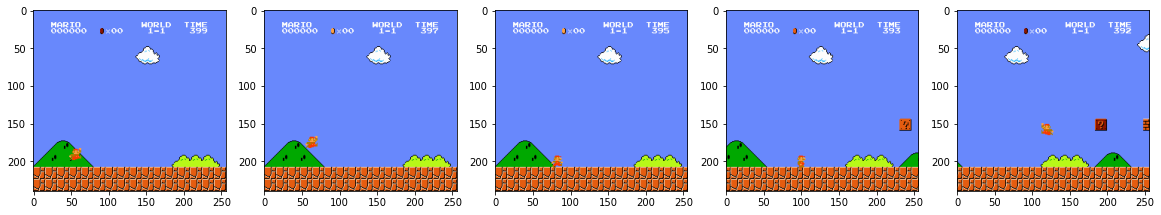

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 5))

env.reset()

done = False
for i in range(50):
    if i % 10:
        state, reward, done, _ = env.step(env.action_space.sample()) # Ejecuta una acción aleatoria
        print(f'Estado: {state.shape}, Recompensa: {reward}, Done: {done}')
        ax[i//10].imshow(state)

In [ ]:
import random
episodes = 5

for i in range(episodes):
    env.reset()
    done = False
    score = 0
    while not done:
        action = random.choice(np.arange(0, 7))
        state, reward, done, _ = env.step(action)
        score += reward
    print(f'Episode: {i + 1} -> Score: {score}')


Episode: 1 -> Score: 1009.0
Episode: 2 -> Score: 230.0
Episode: 3 -> Score: 587.0
Episode: 4 -> Score: 543.0
Episode: 5 -> Score: 794.0


In [ ]:
env = wrap_nes("SuperMarioBros-1-2-v0", actions.SIMPLE_MOVEMENT)

In [ ]:
#Deepmind

def deepmind_model(input_shape, output_size):

    model = keras.Sequential()
    
    model.add(keras.layers.Conv2D(32, 8, strides=4, activation="relu", input_shape=input_shape))
    model.add(keras.layers.Conv2D(32, 8, strides=4, activation="relu"))
    model.add(keras.layers.Conv2D(64, 4, strides=2, activation="relu"))
    #model.add(keras.layers.Conv2D(64, 3, strides=1, activation="relu"))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation="relu", input_shape=input_shape)) #
    model.add(keras.layers.Dense(output_size, activation="linear"))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0001),
        loss= keras.losses.MeanSquaredError(),
        metrics=['mse']
    )

    return model

In [ ]:
def epsilon_greedy(epsilon, model, state):
    '''Exploración vs predicción'''
    random = np.random.uniform(0, 1, size=1)
    if (1 - epsilon) > random:
        action = model.predict(state)
    else:
        action = env.action_space.sample()
    
    epsilon *= 0.99
    epsilon = max(epsilon, 0.01)

    return action, epsilon

In [18]:
model = deepmind_model(input_shape=env.observation_space.shape, output_size=env.action_space.n)
target_model = deepmind_model(input_shape=env.observation_space.shape, output_size=env.action_space.n)


NameError: name 'deepmind_model' is not defined

target = γ * maxaQ(s′,a′,θ) + rt 

In [5]:
model = ConvNet(env.observation_space.shape, env.action_space.n) 
model.cuda()

target_model = ConvNet(env.observation_space.shape, env.action_space.n) 
target_model.cuda()

ConvNet(
  (conv): Sequential(
    (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=3136, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=5, bias=True)
  )
)

In [14]:
episode = 10000
gamma = 0.95
epsilon = 1
epsilon_decay = 0.999
state_memory = deque(maxlen=5000)
action_memory = deque(maxlen=5000)
reward_memory = deque(maxlen=5000)
new_state_memory = deque(maxlen=5000)
done_memory = deque(maxlen=5000)
frame_count = 0
score_list = []
batch_size = 32
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)


In [15]:
def memory_replay(model, target_model, batch_size, gamma, state_memory, action_memory, reward_memory, new_state_memory, done_memory, optimizer):
    if len(state_memory) < batch_size: 
        return None
    else:
        #samples = random.sample(memory, batch_size)
        #states = np.array([sample[0] for sample in samples])
        #next_state = np.array([sample[3] for sample in samples])
        idx = random.choices(range(len(reward_memory)), k=batch_size)

        STATE = torch.tensor(np.array(state_memory)[idx]).cuda()
        ACTION = torch.tensor(np.array(action_memory)[idx]).cuda()
        REWARD = torch.tensor(np.array(reward_memory)[idx]).cuda()
        STATE2 = torch.tensor(np.array(new_state_memory)[idx]).cuda()
        DONE = torch.ByteTensor(np.array(done_memory)[idx]).cuda()
        '''
        current = model(STATE).cuda()
        target = target_model(STATE2).cuda().detach()

        for index in range(len(target)):
        
            done = DONE[index]
            if not done:
                max_future_q = torch.max(target[index])
                
                new_q = REWARD[index] + (gamma * max_future_q)
            else:
                new_q = REWARD[index]
        
            target[index][ACTION] = float(new_q)
        '''
        
        state_action_values = model(STATE).gather(1, ACTION.unsqueeze(-1)).squeeze(-1)
        next_state_values = target_model(STATE2).max(1)[0]
        next_state_values[DONE] = 0.0
        next_state_values = next_state_values.detach()
        expected_state_action_values=(next_state_values * gamma) + REWARD
        expected_state_action_values = expected_state_action_values.float()
        loss_t = nn.MSELoss()(state_action_values, expected_state_action_values).cuda()
        optimizer.zero_grad()


        #l1 = nn.SmoothL1Loss().to('cuda')
        #loss = l1(current, target)
        loss_t.backward()
        optimizer.step()

In [53]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = make_env(env, actions.RIGHT_ONLY)

for i in range(episode):
    score = 0   
    done = False
    state = env.reset()
    state = np.array(state)
    for u in range(env.spec.max_episode_steps):
        
        if frame_count%1000==0:
            target_model.load_state_dict(model.state_dict())
            print('Update')  # Doble Q learning
        env.render(mode='human')
        
        random_number = random.uniform(0, 1)
        if (1 - epsilon) >= random_number:
            action = torch.argmax(model(torch.tensor(state).cuda().unsqueeze(0).cuda())).item()
        else:
            action = env.action_space.sample()
            epsilon *= epsilon_decay
            epsilon = max(epsilon, 0.01)
        
        new_state, reward, done, _ = env.step(action)
        new_state = np.array(new_state)
        score += reward

        
        #target = target_model.predict(np.expand_dims(new_state, 0))
        #if not done:
        #    target[0][action] = reward + (gamma * max(target_model.predict(np.expand_dims(new_state, 0))[0]))
        #else:
        #    target[0][action] = reward
        #model.fit(np.expand_dims(state, 0), np.array(target), verbose=0)

        state_memory.append(state)
        action_memory.append(action)
        reward_memory.append(reward)
        new_state_memory.append(new_state)
        done_memory.append(done)
        
        memory_replay(model, target_model, batch_size, gamma, state_memory, action_memory, reward_memory, new_state_memory, done_memory, optimizer)
        state = new_state
        frame_count += 1
        if done:
            break

    if i % 10 == 0:
        torch.save(model.state_dict(), 'intento_pytorch2.pt')
        print(f'Episode: {i} --> Score {score}')
        print('epsilon: ', epsilon)
        print('frame_count: ', frame_count)
        print(len(action_memory))
    
    score_list.append(score)
    
    

env.close()


ipykernel_launcher:34: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)


Episode: 0 --> Score 178.19999999999965
epsilon:  0.01
frame_count:  298760
5000
Update
Update
Update
Episode: 10 --> Score 200.44999999999948
epsilon:  0.01
frame_count:  301638
5000
Update
Update
Update
Episode: 20 --> Score 240.34999999999917
epsilon:  0.01
frame_count:  304155
5000
Update
Update
Episode: 30 --> Score 70.05000000000007
epsilon:  0.01
frame_count:  306799
5000
Update
Update
Update
Update
Episode: 40 --> Score 234.94999999999925
epsilon:  0.01
frame_count:  310217
5000
Update


In [1]:
len(score_list)

NameError: name 'score_list' is not defined

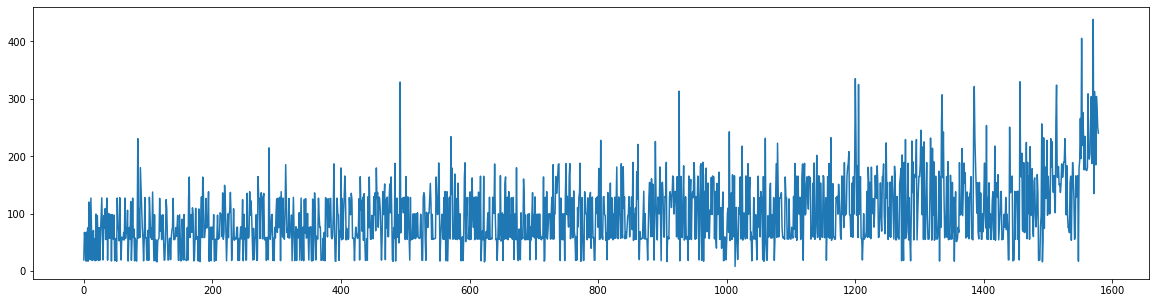

In [48]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot([x for x in range(1579)], score_list)

In [27]:
torch.save(model.state_dict(), 'ultimo3.h5')

In [23]:
model_loaded = ConvNet(env.observation_space.shape, env.action_space.n) 
model_loaded.load_state_dict(torch.load('intento_pytorch2.pt'))
model_loaded.eval()

ConvNet(
  (conv): Sequential(
    (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=3136, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=5, bias=True)
  )
)

In [26]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = make_env(env, actions.RIGHT_ONLY)


state = np.array(env.reset())

done = False
score = 0
while not done:
    env.render(mode='human')
    action = torch.argmax(model_loaded(torch.tensor(state).unsqueeze(0))).item()
    new_state, reward, done, _ = env.step(action)
    state = new_state
    score += reward
print(f'Score: {score}')
env.close()


KeyboardInterrupt: 

In [12]:
env.close()